# Principal Component Analysis / PCA

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Data

In [14]:
from sklearn.datasets import fetch_openml

x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

x = np.array(x)

In [18]:
x, x.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 (70000, 784))

In [16]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

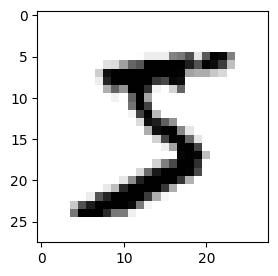

In [17]:
plt.figure(figsize=(3, 3))
plt.imshow(x[0].reshape(28, 28), cmap=mpl.cm.binary)
plt.show()


## PCA 降維

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) # 我想要保留 95% 的信息
z = pca.fit_transform(x)

In [26]:
pca.n_components_ # 降到了多少維度

154

In [ ]:
np.sum(pca.explained_variance_ratio_) # 保留了多少信息

0.9503499702078613

In [21]:
x.shape, z.shape

((70000, 784), (70000, 154))

In [ ]:
wd = pca.components_.T # PCA 的主成分向量
wd.shape

(784, 154)

In [ ]:
s2 = pca.explained_variance_ # 每個主成分對應的解釋方差大小，數值越大代表該主成分對數據的變異性貢獻越多。
len(s2)

154

# Reconstruction

In [27]:
xr = pca.inverse_transform(z) # 將降維後的數據還原回原始維度

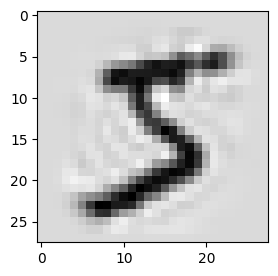

In [28]:
plt.figure(figsize=(3, 3))
plt.imshow(xr[0].reshape(28, 28), cmap=mpl.cm.binary)
plt.show()

# Randomized PCA()

In [29]:
rnd_pca = PCA(n_components=154, svd_solver='randomized', random_state=42)

z_rnd = rnd_pca.fit_transform(x)

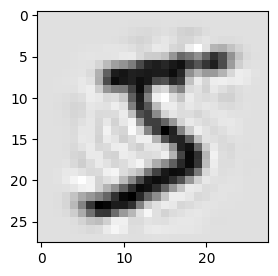

In [30]:
xr_rnd = rnd_pca.inverse_transform(z_rnd)

plt.figure(figsize=(3, 3))
plt.imshow(xr_rnd[0].reshape(28, 28), cmap=mpl.cm.binary)
plt.show()

## IncrementalPCA()

In [31]:
from sklearn.decomposition import IncrementalPCA

inc_pca = IncrementalPCA(n_components=154, batch_size=700)

z_inc = inc_pca.fit_transform(x)

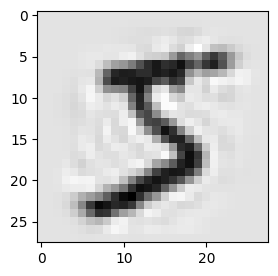

In [32]:
xr_inc = inc_pca.inverse_transform(z_inc)

plt.figure(figsize=(3, 3))
plt.imshow(xr_inc[0].reshape(28, 28), cmap=mpl.cm.binary)
plt.show()